# CBS: Pompprijzen, Auto verkoop en energieprijzen


### Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display



### Bestanden inladen 

In [2]:
# Bestanden inladen
benzine_df = pd.read_csv(r"D:\CBS\CBS Bnezine prijzen.csv")
autos_df = pd.read_csv(r"D:\CBS\CBS Alle verkochte auto's.csv")


### data inzien 


In [3]:
print("Benzineprijzen:")
print(benzine_df.head())

print("\nAutoverkopen:")
print(autos_df.head())

display(autos_df.head())

Benzineprijzen:
  ID;"Perioden";"BenzineEuro95_1";"Diesel_2"
0               0;"20060101";"1.325";"1.003"
1               1;"20060102";"1.328";"1.007"
2               2;"20060103";"1.332";"1.007"
3                3;"20060104";"1.348";"1.02"
4               4;"20060105";"1.347";"1.021"

Autoverkopen:
  ID;"Wegvoertuigen";"BrandstofsoortVoertuig";"Perioden";"TotaalVerkochteWegvoertuigen_1";"NieuwVerkochteWegvoertuigen_2";"TweedehandsVerkochteWegvoertuigen_3"
0  3720;"A018943";"A019276";"2007MM01";"232405";"...                                                                                                           
1  3721;"A018943";"A019276";"2007MM02";"200082";"...                                                                                                           
2  3722;"A018943";"A019276";"2007MM03";"225128";"...                                                                                                           
3  3724;"A018943";"A019276";"2007MM04";"190880";"...       

,"ID;""Wegvoertuigen"";""BrandstofsoortVoertuig"";""Perioden"";""TotaalVerkochteWegvoertuigen_1"";""NieuwVerkochteWegvoertuigen_2"";""TweedehandsVerkochteWegvoertuigen_3"""
0,"3720;""A018943"";""A019276"";""2007MM01"";""232405"";""..."
1,"3721;""A018943"";""A019276"";""2007MM02"";""200082"";""..."
2,"3722;""A018943"";""A019276"";""2007MM03"";""225128"";""..."
3,"3724;""A018943"";""A019276"";""2007MM04"";""190880"";""..."
4,"3725;""A018943"";""A019276"";""2007MM05"";""206044"";""..."


## Pompprijzen

Benzineprijzen per maand (statistieken):


C:\Users\dylan\AppData\Local\Temp\ipykernel_38460\398194606.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_benzine_df['JaarMaand'] = filtered_benzine_df['Datum'].dt.to_period('M').astype(str)


,JaarMaand,BenzineEuro95_1_first,BenzineEuro95_1_last,BenzineEuro95_1_min,BenzineEuro95_1_max,BenzineEuro95_1_mean,Diesel_2_first,Diesel_2_last,Diesel_2_min,Diesel_2_max,Diesel_2_mean
0,2015-01,1.501,1.460,1.458,1.503,1.473065,1.207,1.190,1.184,1.208,1.194065
1,2015-02,1.461,1.557,1.461,1.557,1.520143,1.192,1.291,1.192,1.291,1.253964
2,2015-03,1.559,1.601,1.559,1.603,1.586161,1.291,1.277,1.276,1.294,1.286613
3,2015-04,1.599,1.646,1.592,1.647,1.614467,1.275,1.312,1.261,1.312,1.283367
4,2015-05,1.645,1.639,1.634,1.648,1.640806,1.310,1.306,1.306,1.313,1.309710
...,...,...,...,...,...,...,...,...,...,...,...
119,2024-12,1.953,1.942,1.940,1.958,1.947871,1.740,1.720,1.716,1.748,1.725774
120,2025-01,1.942,1.960,1.942,1.979,1.960935,1.719,1.752,1.719,1.785,1.753516
121,2025-02,1.959,1.953,1.953,1.978,1.967714,1.744,1.730,1.730,1.750,1.742036
122,2025-03,1.950,1.918,1.871,1.953,1.905581,1.724,1.671,1.642,1.731,1.678645


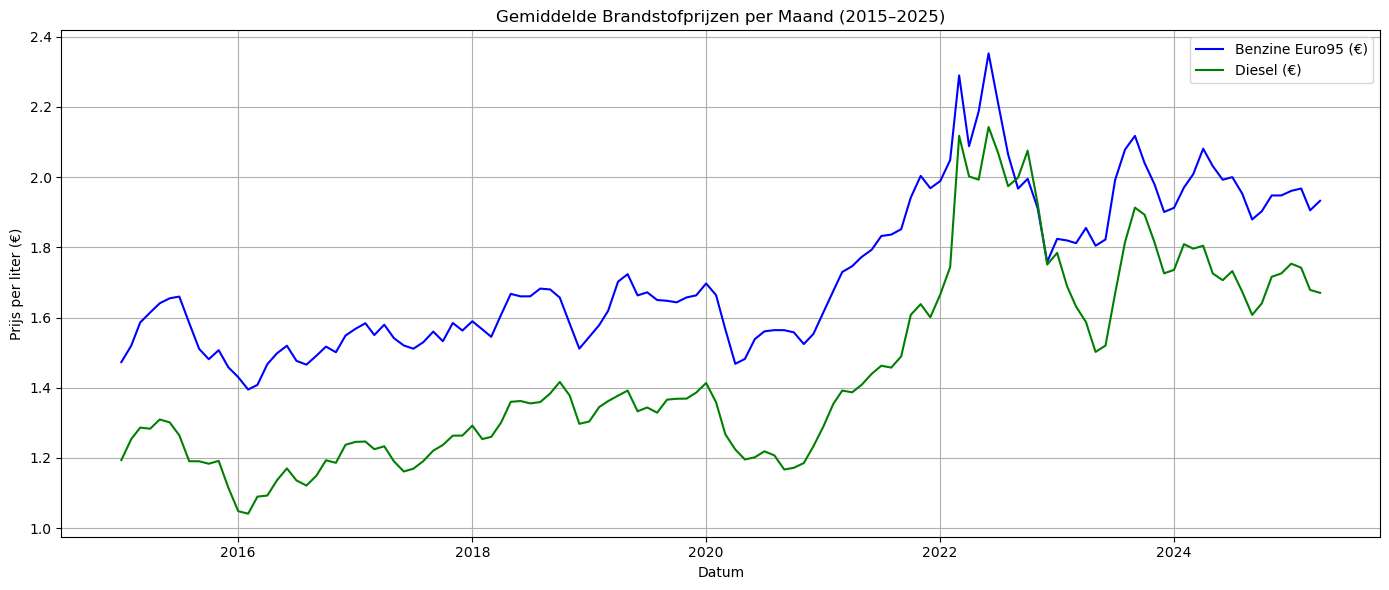

In [4]:
benzine_df = pd.read_csv(r"D:\CBS\CBS Bnezine prijzen.csv", sep=';')

# Datumkolom omzetten naar datetime
benzine_df['Datum'] = pd.to_datetime(benzine_df['Perioden'], format='%Y%m%d', errors='coerce')

# Filter jaren 2015–2025
filtered_benzine_df = benzine_df[(benzine_df['Datum'].dt.year >= 2015) & (benzine_df['Datum'].dt.year <= 2025)]

# Maak 'jaar-maand' kolom
filtered_benzine_df['JaarMaand'] = filtered_benzine_df['Datum'].dt.to_period('M').astype(str)

# Groeperen per maand met uitgebreide statistieken
monthly_stats = filtered_benzine_df.groupby('JaarMaand').agg({
    'BenzineEuro95_1': ['first', 'last', 'min', 'max', 'mean'],
    'Diesel_2': ['first', 'last', 'min', 'max', 'mean']
})

# Kolomnamen netter maken
monthly_stats.columns = ['_'.join(col).strip() for col in monthly_stats.columns.values]
monthly_stats = monthly_stats.reset_index()

# Toon resultaat
# Display the dataframe to the user
print("Benzineprijzen per maand (statistieken):")
display(monthly_stats)

# Zorg dat JaarMaand in datetime-formaat staat (als dat nog niet is gedaan)
monthly_stats['JaarMaand'] = pd.to_datetime(monthly_stats['JaarMaand'])

# Plot beide lijnen
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats['JaarMaand'], monthly_stats['BenzineEuro95_1_mean'], label='Benzine Euro95 (€)', color='blue')
plt.plot(monthly_stats['JaarMaand'], monthly_stats['Diesel_2_mean'], label='Diesel (€)', color='green')

# Grafiek opmaken
plt.title('Gemiddelde Brandstofprijzen per Maand (2015–2025)')
plt.xlabel('Datum')
plt.ylabel('Prijs per liter (€)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


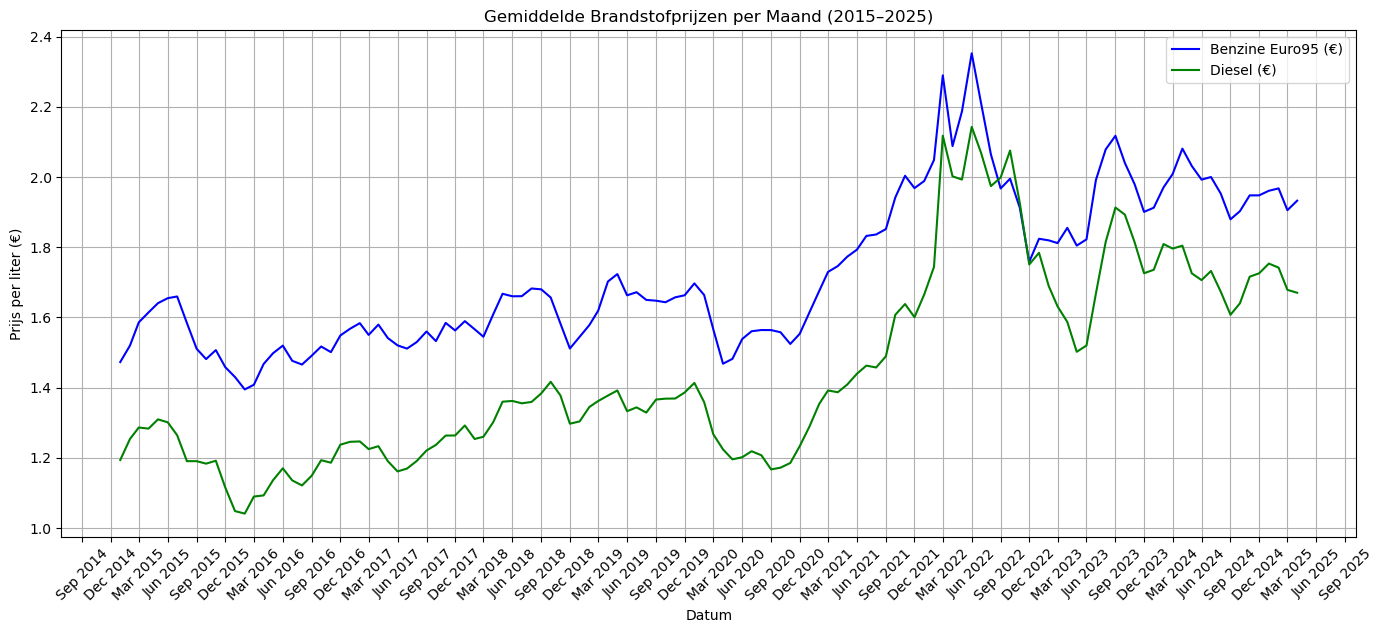

In [5]:
import matplotlib.dates as mdates

# Zorg dat JaarMaand in datetime-formaat staat (als dat nog niet is gedaan)
monthly_stats['JaarMaand'] = pd.to_datetime(monthly_stats['JaarMaand'])

# Plot beide lijnen
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats['JaarMaand'], monthly_stats['BenzineEuro95_1_mean'], label='Benzine Euro95 (€)', color='blue')
plt.plot(monthly_stats['JaarMaand'], monthly_stats['Diesel_2_mean'], label='Diesel (€)', color='green')

# Formatter voor maanden instellen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Elke 3 maanden een label

# Grafiek opmaken
plt.title('Gemiddelde Brandstofprijzen per Maand (2015–2025)')
plt.xlabel('Datum')
plt.ylabel('Prijs per liter (€)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)  # Draai de maandlabels voor betere leesbaarheid
plt.show()


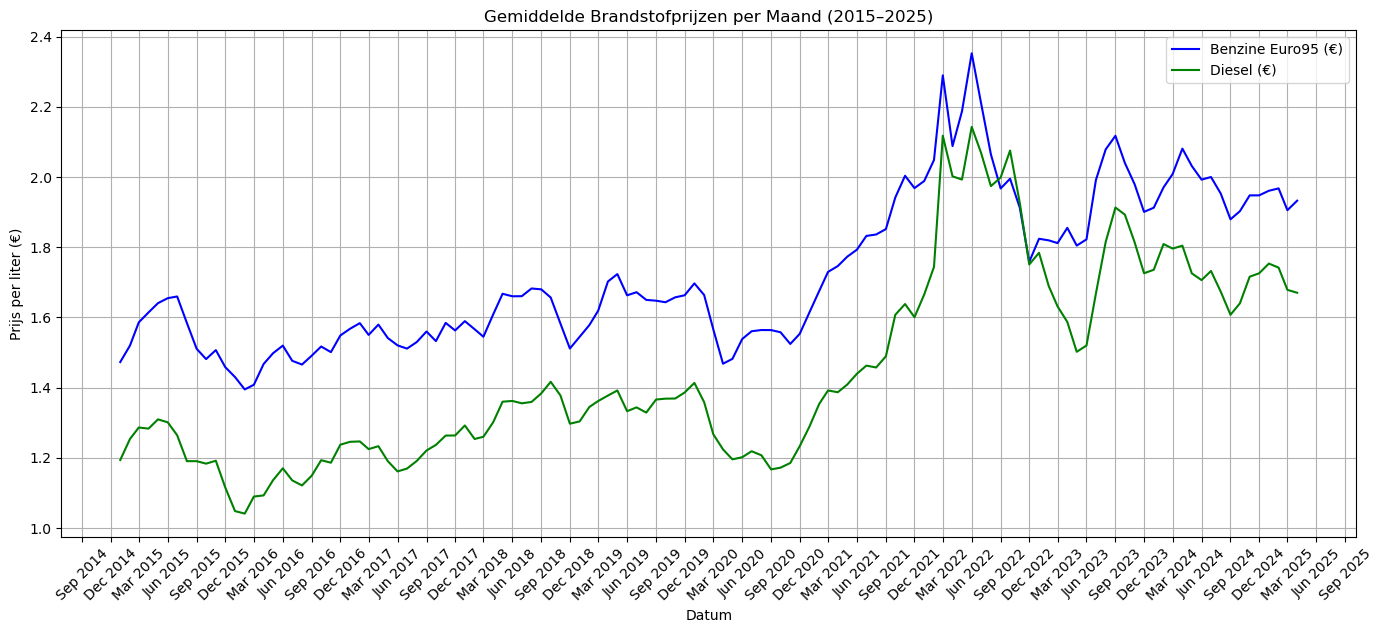

In [6]:
import matplotlib.dates as mdates

# Zorg dat JaarMaand in datetime-formaat staat (als dat nog niet is gedaan)
monthly_stats['JaarMaand'] = pd.to_datetime(monthly_stats['JaarMaand'])

# Plot beide lijnen
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats['JaarMaand'], monthly_stats['BenzineEuro95_1_mean'], label='Benzine Euro95 (€)', color='blue')
plt.plot(monthly_stats['JaarMaand'], monthly_stats['Diesel_2_mean'], label='Diesel (€)', color='green')

# Formatter voor maanden instellen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Elke 3 maanden een label

# Grafiek opmaken
plt.title('Gemiddelde Brandstofprijzen per Maand (2015–2025)')
plt.xlabel('Datum')
plt.ylabel('Prijs per liter (€)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)  # Draai de maandlabels voor betere leesbaarheid
plt.show()


## Auto verkoop

In [7]:
autos_df = pd.DataFrame(data, columns=header)

NameError: name 'data' is not defined

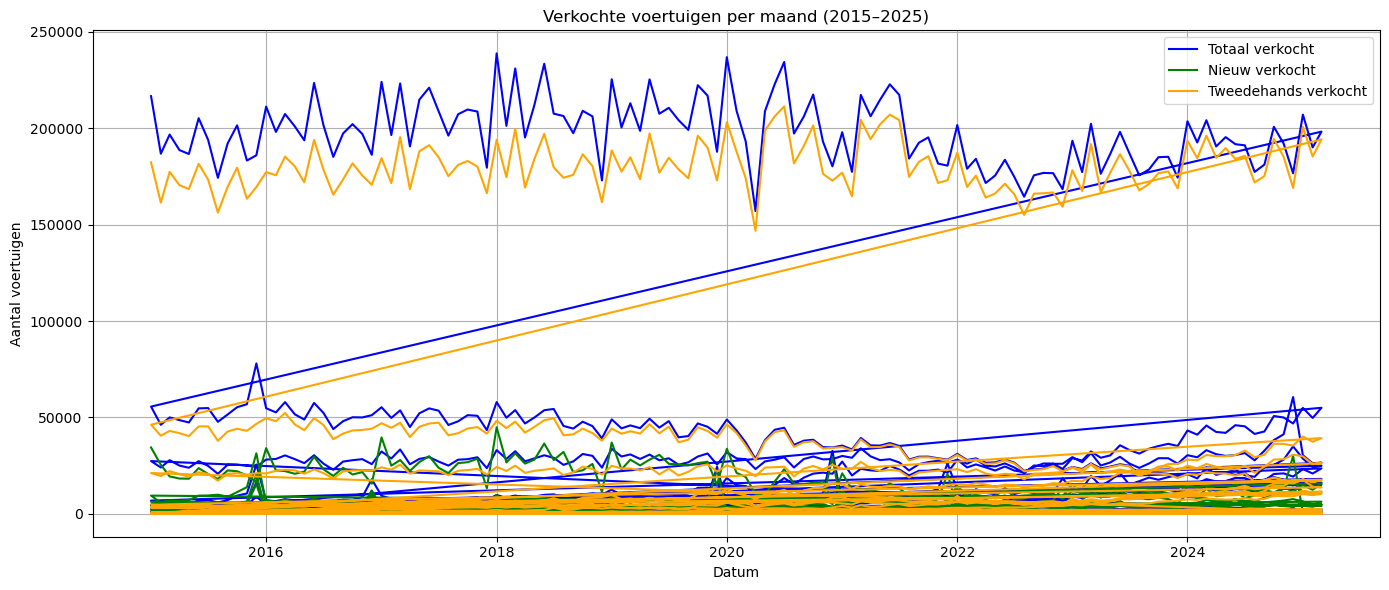

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Inlezen uit Excel
autos_df = pd.read_excel(r"D:\CBS\CBS Alle verkochte auto's.xlsx")

# Datum omzetten
autos_df['Datum'] = pd.to_datetime(
    autos_df['Perioden'].str.replace('MM', ''),  # '2023MM01' → '202301'
    format='%Y%m',
    errors='coerce'
)

# Filter op jaren
autos_df = autos_df[(autos_df['Datum'].dt.year >= 2015) & (autos_df['Datum'].dt.year <= 2025)]

# Converteer kolommen naar numeriek
for col in ['TotaalVerkochteWegvoertuigen_1', 'NieuwVerkochteWegvoertuigen_2', 'TweedehandsVerkochteWegvoertuigen_3']:
    autos_df[col] = pd.to_numeric(autos_df[col], errors='coerce')

# Plotten
plt.figure(figsize=(14, 6))
plt.plot(autos_df['Datum'], autos_df['TotaalVerkochteWegvoertuigen_1'], label='Totaal verkocht', color='blue')
plt.plot(autos_df['Datum'], autos_df['NieuwVerkochteWegvoertuigen_2'], label='Nieuw verkocht', color='green')
plt.plot(autos_df['Datum'], autos_df['TweedehandsVerkochteWegvoertuigen_3'], label='Tweedehands verkocht', color='orange')
plt.title('Verkochte voertuigen per maand (2015–2025)')
plt.xlabel('Datum')
plt.ylabel('Aantal voertuigen')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Groepeer per maand en sommeer de verkopen
autos_per_maand = autos_df.groupby('Datum').agg({
    'TotaalVerkochteWegvoertuigen_1': 'sum',
    'NieuwVerkochteWegvoertuigen_2': 'sum',
    'TweedehandsVerkochteWegvoertuigen_3': 'sum'
}).reset_index()


In [10]:
import matplotlib.dates as mdates

# Plot de gegevens van autos_per_maand_aggregated
plt.figure(figsize=(14, 6))
plt.plot(autos_per_maand_aggregated['Datum'], autos_per_maand_aggregated['TotaalVerkochteWegvoertuigen_1'], label='Totaal verkocht', color='blue')
plt.plot(autos_per_maand_aggregated['Datum'], autos_per_maand_aggregated['NieuwVerkochteWegvoertuigen_2'], label='Nieuw verkocht', color='green')
plt.plot(autos_per_maand_aggregated['Datum'], autos_per_maand_aggregated['TweedehandsVerkochteWegvoertuigen_3'], label='Tweedehands verkocht', color='orange')

# Formatter voor maanden instellen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Elke 3 maanden een label

# Grafiek opmaken
plt.title('Verkochte voertuigen per maand (2015–2025)')
plt.xlabel('Maand')
plt.ylabel('Aantal voertuigen')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Draai de maandlabels voor betere leesbaarheid
plt.show()


NameError: name 'autos_per_maand_aggregated' is not defined

<Figure size 1400x600 with 0 Axes>

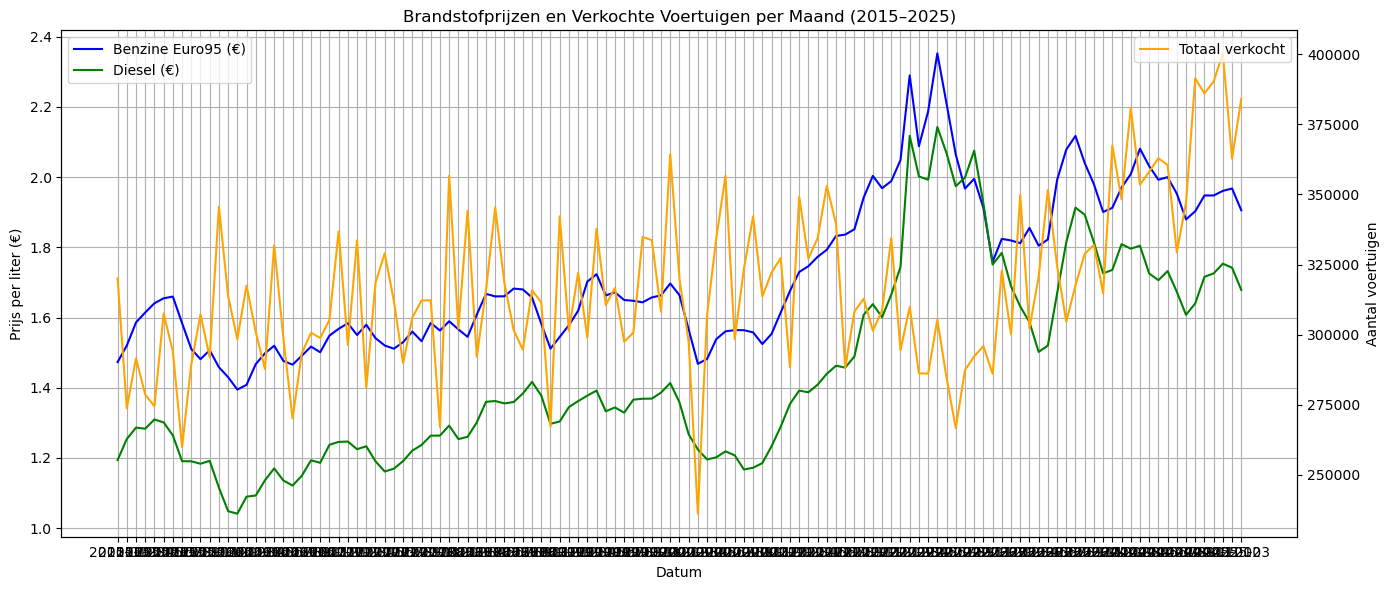

In [11]:
# Zorg dat beide datasets een gemeenschappelijke maandcode hebben (YYYY-MM)
monthly_stats['JaarMaand'] = pd.to_datetime(monthly_stats['JaarMaand'], errors='coerce').dt.to_period('M').astype(str)
autos_per_maand['JaarMaand'] = autos_per_maand['Datum'].dt.to_period('M').astype(str)

# Merge op maand
combined_df = pd.merge(monthly_stats, autos_per_maand, on='JaarMaand', how='inner')

# Plotten
fig, ax1 = plt.subplots(figsize=(14, 6))

# Brandstofprijzen
ax1.plot(combined_df['JaarMaand'], combined_df['BenzineEuro95_1_mean'], label='Benzine Euro95 (€)', color='blue')
ax1.plot(combined_df['JaarMaand'], combined_df['Diesel_2_mean'], label='Diesel (€)', color='green')
ax1.set_xlabel('Datum')
ax1.set_ylabel('Prijs per liter (€)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Verkoopcijfers
ax2 = ax1.twinx()
ax2.plot(combined_df['JaarMaand'], combined_df['TotaalVerkochteWegvoertuigen_1'], label='Totaal verkocht', color='orange')
ax2.set_ylabel('Aantal voertuigen', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Layout
plt.title('Brandstofprijzen en Verkochte Voertuigen per Maand (2015–2025)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Groepeer de vehicle_counts Series per maand
vehicle_counts_monthly = autos_per_maand.groupby(autos_per_maand['Datum'].dt.to_period('M')).agg({
    'TotaalVerkochteWegvoertuigen_1': 'sum'
}).reset_index()

# Zet de vehicle_counts_monthly DataFrame om naar een nieuwe DataFrame
vehicle_counts_monthly.columns = ['Maand', 'Aantal voertuigen']

# Toon de tabel
vehicle_counts_df = vehicle_counts_monthly
display(vehicle_counts_df)


,Maand,Aantal voertuigen
0,2015-01,320045
1,2015-02,273654
2,2015-03,291533
3,2015-04,278536
4,2015-05,274390
...,...,...
118,2024-11,386059
119,2024-12,390340
120,2025-01,400386
121,2025-02,362773


In [ ]:
vehicle_counts_monthly.to_csv('vehicle_counts_monthly.csv', index=False)


In [ ]:
# Zorg dat de kolommen in hetzelfde formaat staan
monthly_stats['JaarMaand'] = monthly_stats['JaarMaand'].astype(str)
autos_per_maand['Datum'] = autos_per_maand['Datum'].astype(str)

# Combineer de dataframes op de gemeenschappelijke kolom
combined_df = pd.merge(monthly_stats, autos_per_maand, left_on='JaarMaand', right_on='Datum', how='inner')

# Verwijder de dubbele kolom 'Datum' als dat nodig is
combined_df.drop(columns=['Datum'], inplace=True)

# Toon de gecombineerde tabel
display(combined_df)


,JaarMaand,BenzineEuro95_1_first,BenzineEuro95_1_last,BenzineEuro95_1_min,BenzineEuro95_1_max,BenzineEuro95_1_mean,Diesel_2_first,Diesel_2_last,Diesel_2_min,Diesel_2_max,Diesel_2_mean,TotaalVerkochteWegvoertuigen_1,NieuwVerkochteWegvoertuigen_2,TweedehandsVerkochteWegvoertuigen_3
0,2015-01,1.501,1.460,1.458,1.503,1.473065,1.207,1.190,1.184,1.208,1.194065,320045,57337,262708
1,2015-02,1.461,1.557,1.461,1.557,1.520143,1.192,1.291,1.192,1.291,1.253964,273654,40170,233484
2,2015-03,1.559,1.601,1.559,1.603,1.586161,1.291,1.277,1.276,1.294,1.286613,291533,36261,255272
3,2015-04,1.599,1.646,1.592,1.647,1.614467,1.275,1.312,1.261,1.312,1.283367,278536,33416,245120
4,2015-05,1.645,1.639,1.634,1.648,1.640806,1.310,1.306,1.306,1.313,1.309710,274390,34819,239571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2024-11,1.914,1.955,1.912,1.986,1.947800,1.652,1.744,1.648,1.774,1.716167,386059,63266,322793
119,2024-12,1.953,1.942,1.940,1.958,1.947871,1.740,1.720,1.716,1.748,1.725774,390340,81638,308702
120,2025-01,1.942,1.960,1.942,1.979,1.960935,1.719,1.752,1.719,1.785,1.753516,400386,49280,351106
121,2025-02,1.959,1.953,1.953,1.978,1.967714,1.744,1.730,1.730,1.750,1.742036,362773,41826,320947


In [ ]:
combined_df.info
        

<bound method DataFrame.info of     JaarMaand  BenzineEuro95_1_first  BenzineEuro95_1_last  \
0     2015-01                  1.501                 1.460   
1     2015-02                  1.461                 1.557   
2     2015-03                  1.559                 1.601   
3     2015-04                  1.599                 1.646   
4     2015-05                  1.645                 1.639   
..        ...                    ...                   ...   
118   2024-11                  1.914                 1.955   
119   2024-12                  1.953                 1.942   
120   2025-01                  1.942                 1.960   
121   2025-02                  1.959                 1.953   
122   2025-03                  1.950                 1.918   

     BenzineEuro95_1_min  BenzineEuro95_1_max  BenzineEuro95_1_mean  \
0                  1.458                1.503              1.473065   
1                  1.461                1.557              1.520143   
2         

In [ ]:
# Zorg dat de kolommen in hetzelfde formaat staan
monthly_stats['JaarMaand'] = monthly_stats['JaarMaand'].astype(str)
autos_per_maand['Datum'] = autos_per_maand['Datum'].astype(str)

# Combineer de dataframes op de gemeenschappelijke kolom
combined_df = pd.merge(monthly_stats, autos_per_maand, left_on='JaarMaand', right_on='Datum', how='inner')

# Verwijder de dubbele kolom 'Datum' als dat nodig is
combined_df.drop(columns=['Datum'], inplace=True)

# Toon de gecombineerde tabel
display(combined_df)



combined_df.to_csv(r"D:\CBS\combined_data.csv", index=False)

,JaarMaand,BenzineEuro95_1_first,BenzineEuro95_1_last,BenzineEuro95_1_min,BenzineEuro95_1_max,BenzineEuro95_1_mean,Diesel_2_first,Diesel_2_last,Diesel_2_min,Diesel_2_max,Diesel_2_mean,TotaalVerkochteWegvoertuigen_1,NieuwVerkochteWegvoertuigen_2,TweedehandsVerkochteWegvoertuigen_3
0,2015-01,1.501,1.460,1.458,1.503,1.473065,1.207,1.190,1.184,1.208,1.194065,320045,57337,262708
1,2015-02,1.461,1.557,1.461,1.557,1.520143,1.192,1.291,1.192,1.291,1.253964,273654,40170,233484
2,2015-03,1.559,1.601,1.559,1.603,1.586161,1.291,1.277,1.276,1.294,1.286613,291533,36261,255272
3,2015-04,1.599,1.646,1.592,1.647,1.614467,1.275,1.312,1.261,1.312,1.283367,278536,33416,245120
4,2015-05,1.645,1.639,1.634,1.648,1.640806,1.310,1.306,1.306,1.313,1.309710,274390,34819,239571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2024-11,1.914,1.955,1.912,1.986,1.947800,1.652,1.744,1.648,1.774,1.716167,386059,63266,322793
119,2024-12,1.953,1.942,1.940,1.958,1.947871,1.740,1.720,1.716,1.748,1.725774,390340,81638,308702
120,2025-01,1.942,1.960,1.942,1.979,1.960935,1.719,1.752,1.719,1.785,1.753516,400386,49280,351106
121,2025-02,1.959,1.953,1.953,1.978,1.967714,1.744,1.730,1.730,1.750,1.742036,362773,41826,320947
